In [1]:
import numpy as np
import matplotlib.pyplot as plt

from lidar import Lidar
from dwa import DWA_tracker as tracker
from astar import astar_path
from trajectory import get_route,generate_trajectory
%matplotlib inline

In [2]:
def map_to_grid(map):
    size = len(map[1])
    grid = np.zeros([size,size]).astype('int')
    for row_num in range(size):
      for ele_num in range(size):
        if map[row_num][ele_num] == 'T':
          grid[row_num][ele_num] = 1 
    return grid,size
arenamap = np.loadtxt("arena.map", skiprows=4, dtype='str')
arena_grid,size = map_to_grid(arenamap)    

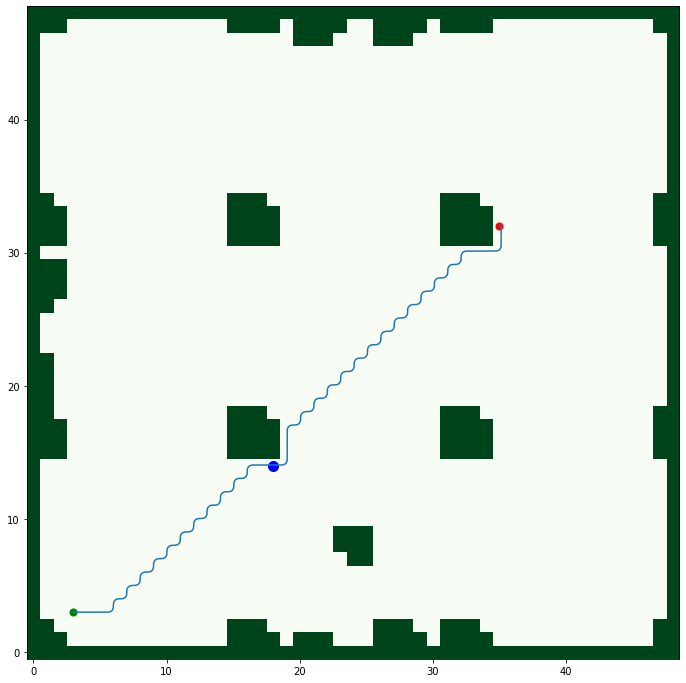

In [3]:
start = (3,3)
goal = (32, 35)
path = astar_path(arena_grid, start, goal)

fig, ax = plt.subplots(figsize=(12,12))
ax.imshow(arena_grid,origin = 'lower', cmap='Greens')
ax.scatter(start[1],start[0], marker = ".", color = "green", s = 200)
ax.scatter(goal[1],goal[0], marker = ".", color = "red", s = 200)
ax.scatter(18,14, marker = ".", color = "blue", s = 400)
theta_init = (np.pi/2)*(path[1][1]>path[0][1]) - (np.pi/2)*(path[1][1]<path[0][1]) + np.pi*(path[1][0]<path[0][0])  
path = generate_trajectory(get_route(path),init_pose = (start[1],start[0],theta_init))
ref_path = path.T
y, x, _ = path
ax.plot(x,y)    

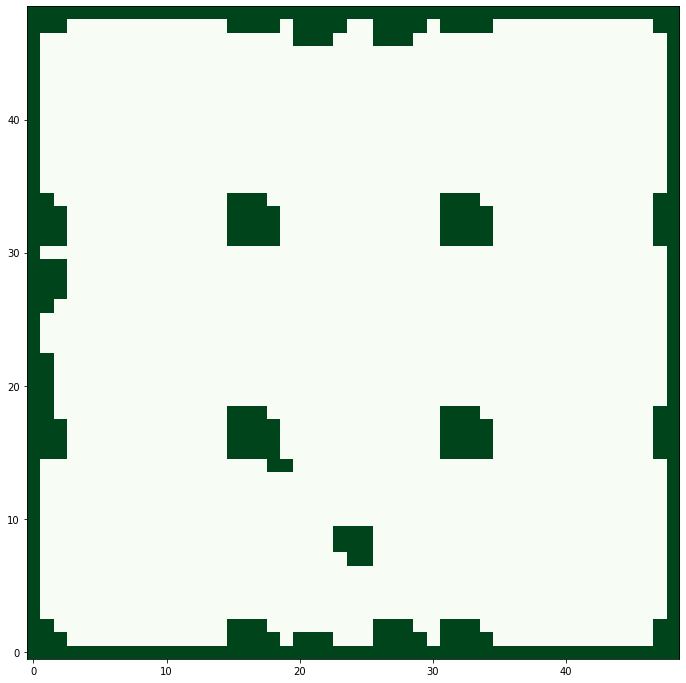

In [7]:
#Rogue obstacle

arena_grid[14,18] = 1
arena_grid[14,19] = 1
arena_grid[15,18] = 1
fig, ax = plt.subplots(figsize=(12,12))
ax.imshow(arena_grid,origin = 'lower', cmap='Greens')

In [8]:
start_pose = [[start[1],start[0],theta_init]]


poses = tracker(start_pose,ref_path,arena_grid)
#print(poses)

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))
ax.imshow(arena_grid,origin = 'lower', cmap='Greens')
ax.scatter(start[1],start[0], marker = ".", color = "green", s = 200)
ax.scatter(goal[1],goal[0], marker = ".", color = "red", s = 200)
ax.plot(x,y) 
ax.plot(poses[:,1], poses[:,0],color = "red") 